In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import time
from tqdm import tnrange, tqdm_notebook

In [16]:
I1 = 5.98
I2 = 18.83
I3 = 28.4
A = 6.06*10**(21)
Epsilon = 10**(-10)
N = 1000
def get_F(Alfa):
    a0 = -3*(A/n)**3*T**(9/2)*math.exp(-(I1+I2+I3)/T)
    a1 = (A/n)**3*T**(9/2)*math.exp(-(I1+I2+I3)/T)-2*(A/n)**2*T**(3)*math.exp(-(I1+I2)/T)
    a2 = (A/n)**2*T**(3)*math.exp(-(I1+I2)/T)-(A/n)*T**(3/2)*math.exp(-I1/T)
    a3 = (A/n)*T**(3/2)*math.exp(-I1/T)
    a4 = 1
    return a4*Alfa**4 + a3*Alfa**3 + a2*Alfa**2 + a1*Alfa + a0

def Dihotomy(a,b,Func, epsilon):
    while b-a > epsilon:
        c = (a + b)/2
        if np.sign(Func(c)) == np.sign(Func(a)):
            a = c
        else:
            b = c
    return (a+b)/2

def Saha(A,n,T,I):
    return A/n*T**(1.5)*math.exp(-I/T)

def get_Alfa(n,T,N,Epsilon):
    Alfa = Dihotomy(0.0000001,3,get_F, Epsilon)
    Alfa0 = 1/(1+Saha(A,n,T,I1)/Alfa+Saha(A,n,T,I1)*Saha(A,n,T,I2)/Alfa**2+Saha(A,n,T,I1)*Saha(A,n,T,I2)*Saha(A,n,T,I3)/Alfa**3)
    Alfa1 = Alfa0/Alfa*Saha(A,n,T,I1)
    Alfa2 = Alfa1/Alfa*Saha(A,n,T,I2)
    Alfa3 = Alfa2/Alfa*Saha(A,n,T,I3)
    
    Alfa_array = np.zeros(5,float)
    
    Alfa_array[0]=Alfa0
    Alfa_array[1]=Alfa1
    Alfa_array[2]=Alfa2
    Alfa_array[3]=Alfa3
    Alfa_array[4]=Alfa
    
    return Alfa_array

In [17]:
n = 10**(20)
T = 1
AlfaAR = get_Alfa(n,T,N,Epsilon)

print('n:', '{0:10e}'.format(n))
print('T:', T)
print('Alfa:', '{0:10e}'.format( AlfaAR[4]))
print('Alfa0:','{0:10e}'.format( AlfaAR[0]))
print('Alfa1:','{0:10e}'.format( AlfaAR[1]))
print('Alfa2:','{0:10e}'.format( AlfaAR[2]))
print('Alfa3:','{0:10e}'.format( AlfaAR[3]))

n: 1.000000e+20
T: 1
Alfa: 3.222730e-01
Alfa0: 6.777274e-01
Alfa1: 3.222722e-01
Alfa2: 4.024449e-07
Alfa3: 3.507453e-17


In [18]:
n = 10**(20)
T = 2
AlfaAR = get_Alfa(n,T,N,Epsilon)

print('n:', '{0:10e}'.format(n))
print('T:', T)
print('Alfa:', '{0:10e}'.format( AlfaAR[4]))
print('Alfa0:','{0:10e}'.format( AlfaAR[0]))
print('Alfa1:','{0:10e}'.format( AlfaAR[1]))
print('Alfa2:','{0:10e}'.format( AlfaAR[2]))
print('Alfa3:','{0:10e}'.format( AlfaAR[3]))

n: 1.000000e+20
T: 2
Alfa: 9.185592e-01
Alfa0: 9.499996e-02
Alfa1: 8.914426e-01
Alfa2: 1.355568e-02
Alfa3: 1.722068e-06


In [19]:
n = 10**(20)
T = 3
AlfaAR = get_Alfa(n,T,N,Epsilon)

print('n:', '{0:10e}'.format(n))
print('T:', T)
print('Alfa:', '{0:10e}'.format( AlfaAR[4]))
print('Alfa0:','{0:10e}'.format( AlfaAR[0]))
print('Alfa1:','{0:10e}'.format( AlfaAR[1]))
print('Alfa2:','{0:10e}'.format( AlfaAR[2]))
print('Alfa3:','{0:10e}'.format( AlfaAR[3]))

n: 1.000000e+20
T: 3
Alfa: 1.296554e+00
Alfa0: 2.021159e-02
Alfa1: 6.687604e-01
Alfa2: 3.052901e-01
Alfa3: 5.737931e-03


In [20]:
n = 10**(17)
T = 1
AlfaAR = get_Alfa(n,T,N,Epsilon)

print('n:', '{0:10e}'.format(n))
print('T:', T)
print('Alfa:', '{0:10e}'.format( AlfaAR[4]))
print('Alfa0:','{0:10e}'.format( AlfaAR[0]))
print('Alfa1:','{0:10e}'.format( AlfaAR[1]))
print('Alfa2:','{0:10e}'.format( AlfaAR[2]))
print('Alfa3:','{0:10e}'.format( AlfaAR[3]))

n: 1.000000e+17
T: 1
Alfa: 9.939605e-01
Alfa0: 6.441620e-03
Alfa1: 9.931563e-01
Alfa2: 4.021203e-04
Alfa3: 1.136308e-11


In [21]:
n = 10**(17)
T = 2
AlfaAR = get_Alfa(n,T,N,Epsilon)

print('n:', '{0:10e}'.format(n))
print('T:', T)
print('Alfa:', '{0:10e}'.format( AlfaAR[4]))
print('Alfa0:','{0:10e}'.format( AlfaAR[0]))
print('Alfa1:','{0:10e}'.format( AlfaAR[1]))
print('Alfa2:','{0:10e}'.format( AlfaAR[2]))
print('Alfa3:','{0:10e}'.format( AlfaAR[3]))
print(AlfaAR)

n: 1.000000e+17
T: 2
Alfa: 1.934722e+00
Alfa0: 2.593331e-05
Alfa1: 1.155358e-01
Alfa2: 8.341287e-01
Alfa3: 5.030956e-02
[2.59333117e-05 1.15535793e-01 8.34128716e-01 5.03095578e-02
 1.93472190e+00]


In [10]:
n = 10**(17)
T = 3
AlfaAR = get_Alfa(n,T,N,Epsilon)

print('n:', '{0:10e}'.format(n))
print('T:', T)
print('Alfa:', '{0:10e}'.format( AlfaAR[4]))
print('Alfa0:','{0:10e}'.format( AlfaAR[0]))
print('Alfa1:','{0:10e}'.format( AlfaAR[1]))
print('Alfa2:','{0:10e}'.format( AlfaAR[2]))
print('Alfa3:','{0:10e}'.format( AlfaAR[3]))

n: 1.000000e+17
T: 3
Alfa: 2.892902e+00
Alfa0: 3.495667e-08
Alfa1: 5.183906e-04
Alfa2: 1.060611e-01
Alfa3: 8.934205e-01


In [11]:
N = 1000
AlfaArray = np.zeros((5,N),float)
X = np.zeros(N,float)
n = 10**(17)

a = 0.2
b = 4
for i in range(0,N):
    Ti = a + (b - a)/(N-1)*i
    T = Ti
    X[i] = Ti
    AlfaAR = get_Alfa(n,Ti,N,Epsilon)
    AlfaArray[0][i] = AlfaAR[0]
    AlfaArray[1][i] = AlfaAR[1]
    if AlfaAR[2]>1/n:
        AlfaArray[2][i] = AlfaAR[2]
    else :
        AlfaArray[2][i]=1/n
    if AlfaAR[3]> 1/n:
        AlfaArray[3][i] = AlfaAR[3]
    else :
        AlfaArray[3][i]=1/n
    AlfaArray[4][i] = AlfaAR[4]

[Text(0.5, 0, 'T'), Text(0, 0.5, 'YE')]

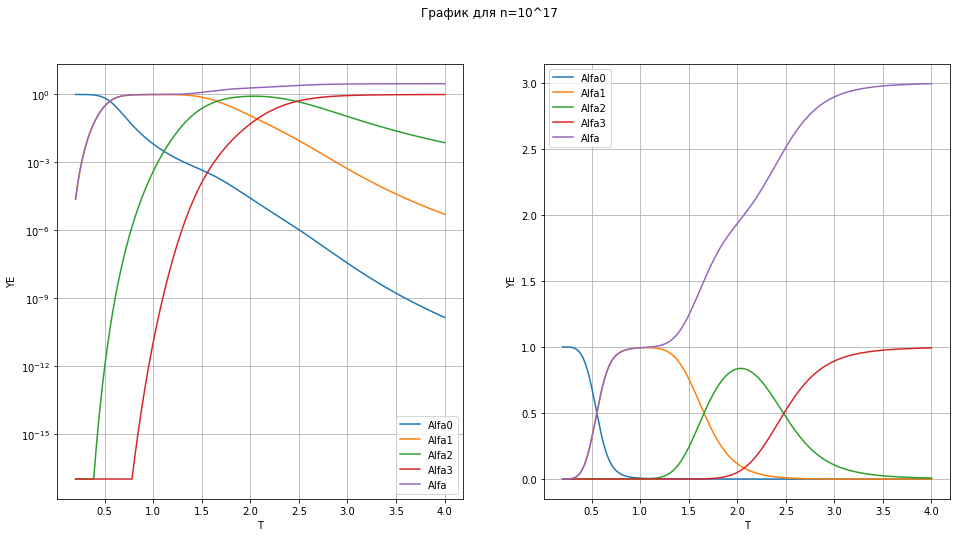

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8))
fig.suptitle('График для n=10^17')

ax1.plot(X,AlfaArray[0,:],label='Alfa0')
ax1.plot(X,AlfaArray[1,:],label='Alfa1')
ax1.plot(X,AlfaArray[2,:],label='Alfa2')
ax1.plot(X,AlfaArray[3,:],label='Alfa3')
ax1.plot(X,AlfaArray[4,:],label='Alfa')
ax1.legend()
ax1.grid()
ax1.set(xlabel='T', ylabel='YE')
ax1.set_yscale('log')

ax2.plot(X,AlfaArray[0,:],label='Alfa0')
ax2.plot(X,AlfaArray[1,:],label='Alfa1')
ax2.plot(X,AlfaArray[2,:],label='Alfa2')
ax2.plot(X,AlfaArray[3,:],label='Alfa3')
ax2.plot(X,AlfaArray[4,:],label='Alfa')
ax2.legend()
ax2.grid()
ax2.set(xlabel='T', ylabel='YE')

In [13]:
N = 1000
AlfaArray = np.zeros((5,N),float)
X = np.zeros(N,float)
n = 10**(20)

a = 0.2
b = 10
for i in range(0,N):
    Ti = a + (b - a)/(N-1)*i
    X[i] = Ti
    T=Ti
    AlfaAR = get_Alfa(n,Ti,N,Epsilon)
    AlfaArray[0][i] = AlfaAR[0]
    AlfaArray[1][i] = AlfaAR[1]
    if AlfaAR[2]>1/n:
        AlfaArray[2][i] = AlfaAR[2]
    else :
        AlfaArray[2][i]=1/n
    if AlfaAR[3]> 1/n:
        AlfaArray[3][i] = AlfaAR[3]
    else :
        AlfaArray[3][i]=1/n
    AlfaArray[4][i] = AlfaAR[4]

[Text(0.5, 0, 'T'), Text(0, 0.5, 'YE')]

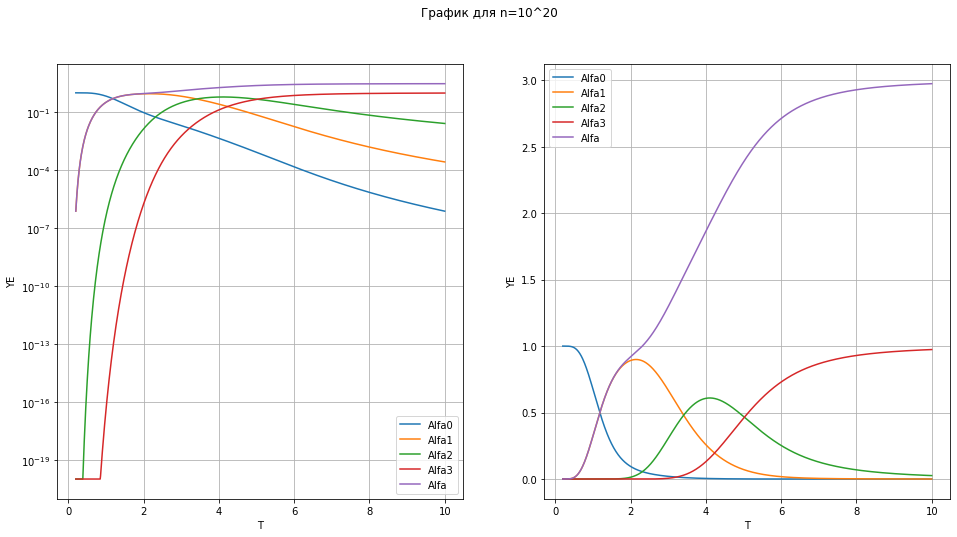

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,8))
fig.suptitle('График для n=10^20')

ax1.plot(X,AlfaArray[0,:],label='Alfa0')
ax1.plot(X,AlfaArray[1,:],label='Alfa1')
ax1.plot(X,AlfaArray[2,:],label='Alfa2')
ax1.plot(X,AlfaArray[3,:],label='Alfa3')
ax1.plot(X,AlfaArray[4,:],label='Alfa')
ax1.legend()
ax1.grid()
ax1.set(xlabel='T', ylabel='YE')
ax1.set_yscale('log')

ax2.plot(X,AlfaArray[0,:],label='Alfa0')
ax2.plot(X,AlfaArray[1,:],label='Alfa1')
ax2.plot(X,AlfaArray[2,:],label='Alfa2')
ax2.plot(X,AlfaArray[3,:],label='Alfa3')
ax2.plot(X,AlfaArray[4,:],label='Alfa')
ax2.legend()
ax2.grid()
ax2.set(xlabel='T', ylabel='YE')